**ИТОГОВАЯ АТТЕСТАЦИОННАЯ РАБОТА**

по дополнительной профессиональной программе профессиональной переподготовки


**Аналитик данных**

Выполнила: Волкова Анастасия Александровна

Номер потока: АнДн-811

Преподаватель: Астапов Павел Евгеньевич

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Аналитик_обучение/credit.csv', sep=';')
print(df.describe())


           client_id         gender            age  marital_status  \
count  170746.000000  170746.000000  170744.000000   170741.000000   
mean    85373.500000       1.480532      36.497312        3.197586   
std     49290.268869       0.499622      10.546067        0.738570   
min         1.000000       1.000000      18.000000        1.000000   
25%     42687.250000       1.000000      28.000000        3.000000   
50%     85373.500000       1.000000      34.000000        3.000000   
75%    128059.750000       2.000000      43.000000        4.000000   
max    170746.000000       2.000000      71.000000        5.000000   

        job_position   credit_month      education      tariff_id  \
count  170746.000000  170746.000000  170743.000000  170746.000000   
mean       13.160015      10.980749       3.202714      14.118831   
std         3.132421       3.536698       1.064026      11.546768   
min         1.000000       3.000000       1.000000       1.000000   
25%        14.000000    

In [ ]:
#Корректировка заголовков
df.columns = [col.strip().lower() for col in df.columns]
# Быстрый просмотр
print(df.info())
print()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170746 entries, 0 to 170745
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   client_id             170746 non-null  int64  
 1   gender                170746 non-null  int64  
 2   age                   170744 non-null  float64
 3   marital_status        170741 non-null  float64
 4   job_position          170746 non-null  int64  
 5   credit_sum            170745 non-null  object 
 6   credit_month          170746 non-null  int64  
 7   score_shk             170743 non-null  object 
 8   education             170743 non-null  float64
 9   tariff_id             170746 non-null  int64  
 10  living_region         170554 non-null  float64
 11  okrug                 170554 non-null  float64
 12  avregzarplata         170554 non-null  float64
 13  monthly_income        170744 non-null  float64
 14  credit_count          161516 non-null  float64
 15  

In [ ]:
df['score_shk'] = df['score_shk'].astype(str)
# 2. Замена запятых на точки
df['score_shk'] = df['score_shk'].str.replace(',', '.')
# 3. Преобразование обратно в числовой формат
df['score_shk'] = df['score_shk'].astype(float)

df['credit_sum'] = df['credit_sum'].astype(str)
# 2. Замена запятых на точки
df['credit_sum'] = df['credit_sum'].str.replace(',', '.')
# 3. Преобразование обратно в формат
df['credit_sum'] = df['credit_sum'].astype(float)
#Удаление пропусков
df['credit_sum'] = df['credit_sum'].fillna(0)

df['avregzarplata'] = df['avregzarplata'].astype(int)
df['monthly_income'] = df['monthly_income'].astype(int)
df['credit_count'] = df['credit_count'].astype(int)
df['overdue_credit_count'] = df['overdue_credit_count'].astype(int)

# Обработка числовых столбцов
df['age'] = df['age'].fillna(df['age'].median())
df['age'] = df['age'].astype(int)

df['monthly_income'] = df['monthly_income'].fillna(df['monthly_income'].median())
df['credit_count'] = df['credit_count'].fillna(0)
df['overdue_credit_count'] = df['overdue_credit_count'].fillna(0)
df['avregzarplata'] = df['avregzarplata'].fillna(df['avregzarplata'].median())

# Обработка категориальных столбцов
df['marital_status'] = df['marital_status'].fillna(0)
df['marital_status'] = df['marital_status'].astype(int)

df['education'] = df['education'].astype(int)
df['education'] = df['education'].fillna(0)

df['living_region'] = df['living_region'].astype(int)
df['living_region'] = df['living_region'].fillna(0)

df['score_shk'] = df['score_shk'].astype(float)
df['score_shk'] = df['score_shk'].fillna(0)

df['okrug'] = df['okrug'].astype(int)
df['okrug'] = df['okrug'].fillna(0)


df

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,score_shk,education,tariff_id,living_region,okrug,avregzarplata,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,1,2,48,3,15,59998.00,10,0.770249,2,28,23,8,25850,30000,1,1,0
1,2,1,28,0,15,10889.00,6,0.248514,2,2,30,7,66880,43000,2,0,0
2,3,2,32,3,14,10728.00,12,0.459589,4,2,64,2,23430,23000,5,0,0
3,4,1,27,2,14,12009.09,12,0.362536,2,2,8,8,23650,17000,2,0,0
4,5,2,45,3,14,16908.89,10,0.421385,4,2,77,6,26620,35000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170741,170742,1,27,4,14,64867.00,12,0.535257,2,2,57,2,27060,40000,6,0,0
170742,170743,1,24,3,14,17640.00,6,0.573287,4,28,63,3,45430,30000,1,0,0
170743,170744,1,31,4,14,27556.47,10,0.416098,2,19,41,1,33990,40000,1,0,0
170744,170745,1,53,2,10,6189.00,12,0.482595,4,2,39,2,22990,31000,2,0,0


In [ ]:
# Подсчитать количество дублирующихся client_id
num_duplicate_client_ids = df['client_id'].duplicated().sum()

# Вывод результата
print(f"Количество дублирующихся client_id: {num_duplicate_client_ids}")


Количество дублирующихся client_id: 0


In [ ]:
nan_counts = df.isna().sum()
print("Количество NaN в каждом столбце:")
print(nan_counts)

Количество NaN в каждом столбце:
client_id               0
gender                  0
age                     0
marital_status          0
job_position            0
credit_sum              0
credit_month            0
score_shk               0
education               0
tariff_id               0
living_region           0
okrug                   0
avregzarplata           0
monthly_income          0
credit_count            0
overdue_credit_count    0
open_account_flg        0
dtype: int64


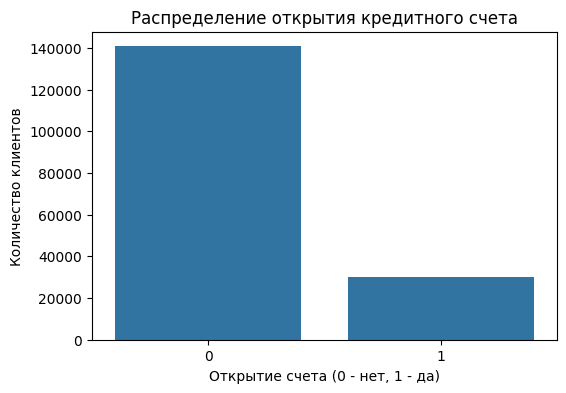

In [ ]:
# Визуализация распределения по факту открытия счетов
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x='open_account_flg', data=df)
plt.title('Распределение открытия кредитного счета')
plt.xlabel('Открытие счета (0 - нет, 1 - да)')
plt.ylabel('Количество клиентов')
plt.show()


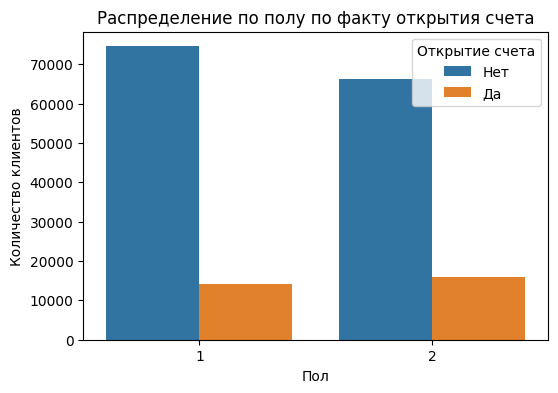

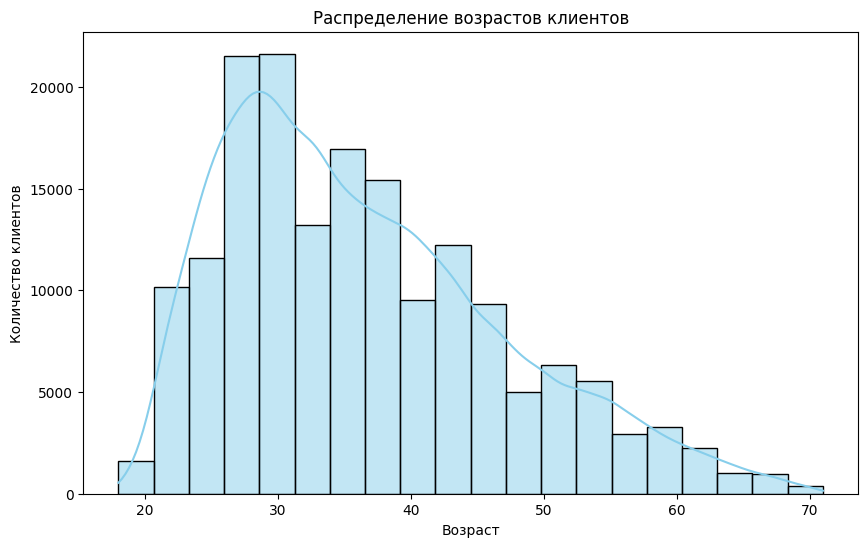

In [ ]:
# Распределение по полу
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', hue='open_account_flg', data=df)
plt.title('Распределение по полу по факту открытия счета')
plt.xlabel('Пол')
plt.ylabel('Количество клиентов')
plt.legend(title='Открытие счета', loc='upper right', labels=['Нет', 'Да'])
plt.show()

# Возрастные группы
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, color='skyblue', kde=True)
plt.title('Распределение возрастов клиентов')
plt.xlabel('Возраст')
plt.ylabel('Количество клиентов')
plt.show()

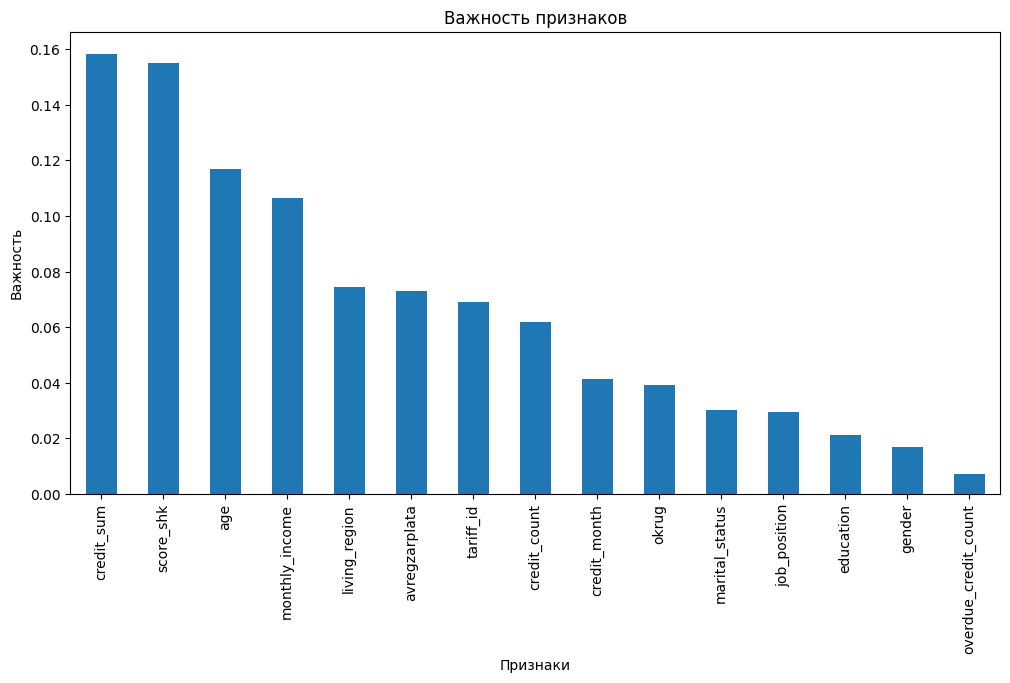

                      Importance
credit_sum              0.161052
score_shk               0.156621
age                     0.117423
monthly_income          0.107401
living_region           0.073172
avregzarplata           0.071923
tariff_id               0.070272
credit_count            0.061354
credit_month            0.039846
okrug                   0.038117
marital_status          0.030274
job_position            0.029371
education               0.020336
gender                  0.015918
overdue_credit_count    0.006919


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Подготовка данных
X = df.drop(columns=['client_id', 'open_account_flg'])
y = df['open_account_flg']

# Преобразовать категориальные переменные с помощью one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Модель Random Forest для оценки важности признаков
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Важность признаков
importance = rf_model.feature_importances_
feature_importance = pd.Series(importance, index=X.columns).sort_values(ascending=False)

# Визуализация важности признаков
plt.figure(figsize=(12, 6))
feature_importance.plot(kind='bar')
plt.title('Важность признаков')
plt.xlabel('Признаки')
plt.ylabel('Важность')
plt.show()

# Использование RandomForest для оценки важности признаков
from sklearn.ensemble import RandomForestClassifier

# Подготовка данных для обучения модели
X = df.drop(columns=['client_id', 'open_account_flg'])
y = df['open_account_flg']

# Кодируем категориальные переменные
X = pd.get_dummies(X, drop_first=True)

# Настройка и обучение классификатора
model = RandomForestClassifier()
model.fit(X, y)

# Важность признаков
importances = model.feature_importances_
feature_importances = pd.DataFrame(importances, index=X.columns, columns=["Importance"]).sort_values("Importance", ascending=False)

print(feature_importances)

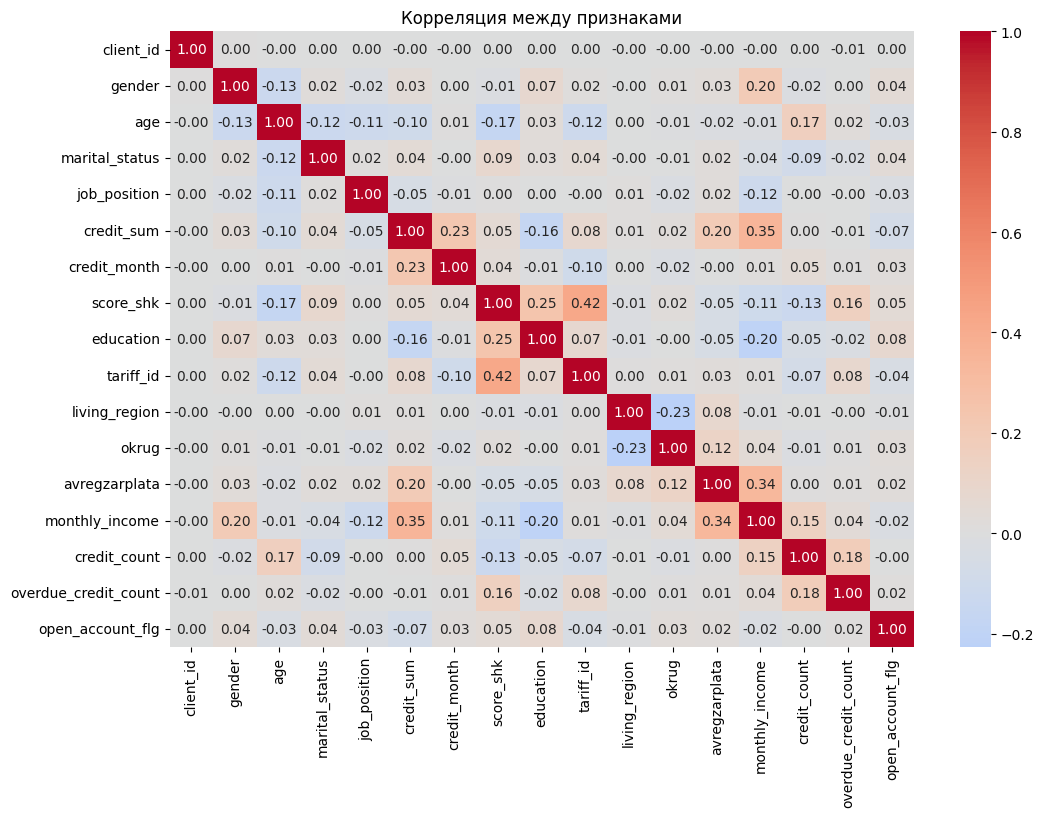

In [ ]:
# Корреляция между числовыми признаками
correlation_matrix = df.corr()

# Визуализация корреляции
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Корреляция между признаками')
plt.show()


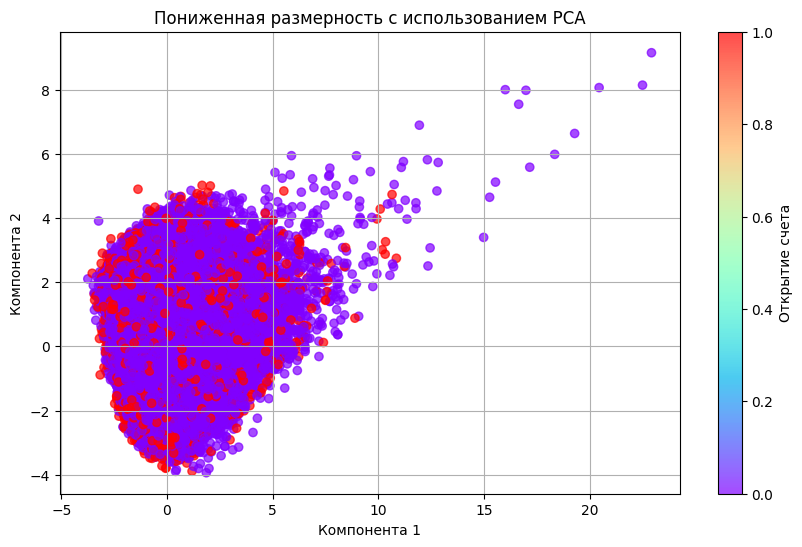

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Обработка категориальных данных
X = df.drop(columns=['client_id', 'open_account_flg'])
y = df['open_account_flg']

# Кодируем категориальные переменные
X = pd.get_dummies(X, drop_first=True)

# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Применение PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Визуализация результатов PCA
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='rainbow', alpha=0.7)
plt.title('Пониженная размерность с использованием PCA')
plt.xlabel('Компонента 1')
plt.ylabel('Компонента 2')
plt.colorbar(label='Открытие счета')
plt.grid(True)
plt.show()

In [ ]:
from scipy import stats

# Разделение данных на группы
group_yes = df[df['open_account_flg'] == 1]['monthly_income']
group_no = df[df['open_account_flg'] == 0]['monthly_income']

# Выполнение t-теста
t_stat, p_value = stats.ttest_ind(group_yes, group_no)

print(f'P-value: {p_value}')

# Уровень значимости
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: есть статистически значимая разница между группами.")
else:
    print("Не можем отвергнуть нулевую гипотезу: нет статистически значимой разницы.")

P-value: 1.216285708415475e-22
Отвергаем нулевую гипотезу: есть статистически значимая разница между группами.


**Вывод:**

На основании P-value мы отвергаем нулевую гипотезу. Это означает, что есть статистически значимая разница между группами клиентов, которые открывают карту, и теми, кто не открывает. Различия между группами не случайны и обусловлены реальными факторами, такими как сумма кредита (credit_sum), скоринговый балл (score_shk), возраст (age), доход (monthly_income) и другие важные признаки.

На первом графике распределения открытия кредитного счёта видно, что большинство клиентов не открывают кредитный счёт (значение 0), а доля клиентов, которые открывают счёт (значение 1), значительно меньше и из-за этого данные несбалансированы.

Далее на втором графике показано гендерное распределение открытия счёта в зависимости от пола: gender = 1 и  gender= 2 имеют схожее поведение, но доля 1-х, открывающих счёт, немного выше. В итоге пол не является ключевым фактором.

По возрастному признаку: основная масса клиентов находится в возрасте от 25 до 40 лет.Распределение возрастов имеет правосторонний перекос (меньше клиентов старше 50 лет). Получается, что возраст является значимым фактором (важность 0.117423). Молодые клиенты (25–40 лет) чаще открывают кредитные счета.

На тепловой карте корреляции видно следующее:

Сильная корреляция между credit_sum (сумма кредита) и monthly_income (месячный доход), а также между avregzarplata (средняя зарплата по региону) и monthly_income. open_account_flg (открытие счёта) имеет слабую корреляцию с большинством признаков, что говорит о том, что для предсказания открытия счёта важны нелинейные зависимости.
Поэтому для анализа открытия счёта важны такие признаки, как credit_sum, score_shk, age, monthly_income и living_region.

*На основе графика важности признаков:*

credit_sum (важность 0.161052): Сумма кредита — самый важный фактор.
score_shk (важность 0.156621): Скоринговый балл клиента.
age (важность 0.117423): Возраст клиента.
monthly_income (важность 0.107401): Месячный доход клиента.
living_region (важность 0.073172): Регион проживания клиента.
Менее значимые признаки:
overdue_credit_count (важность 0.006919): Количество просроченных кредитов имеет минимальное влияние.

Вывод: Для предсказания открытия счёта нужно сосредоточиться на ключевых признаках, таких как сумма кредита, скоринговый балл, возраст и доход.

*График PCA:* Данные имеют плотное распределение в центральной области, что говорит о том, что большинство клиентов имеют схожие характеристики.
Точки, выходящие за пределы основной массы, могут быть выбросами или представлять уникальные группы клиентов. Красные точки (клиенты, которые открывают счёт) и синие точки (клиенты, которые не открывают счёт) перекрываются в центральной области графика. Это говорит о том, что разделение классов не является однозначным — клиенты из обеих групп имеют схожие характеристики.

***Так какой же портрет клиента?***

*Клиенты, которые будут открывать карту:*

Возраст: 25–40 лет.
Скоринговый балл: Высокий (score_shk).
Сумма кредита: Средняя или высокая.
Месячный доход: Средний или выше среднего.
Регион проживания: Регион с высокой средней зарплатой (avregzarplata).

*Клиенты, которые не будут открывать карту:*

Возраст: Старше 50 лет или младше 25 лет.
Скоринговый балл: Низкий.
Сумма кредита: Низкая.
Месячный доход: Низкий.
Регион проживания: Регион с низкой средней зарплатой.